<a href="https://colab.research.google.com/github/Laura-Neff/DimensionalityReduction_NonLinearData/blob/main/DimensionalityReduction_NonLinearData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#Non-linear data = data that is twisted and turned and curved in higher dimensional space; data that can't be expressed in terms of linear combinations of basis vectors

In [ ]:
X, color = datasets.make_swiss_roll(n_samples = 2000)

print ("Shape of X : ", X.shape)
print ("Shape of color : ", color.shape) #represents univariate position of the sample according to the main dimension of the points in the manifold - points close to one another will have a similar color

Shape of X :  (2000, 3)
Shape of color :  (2000,)


##Load Data

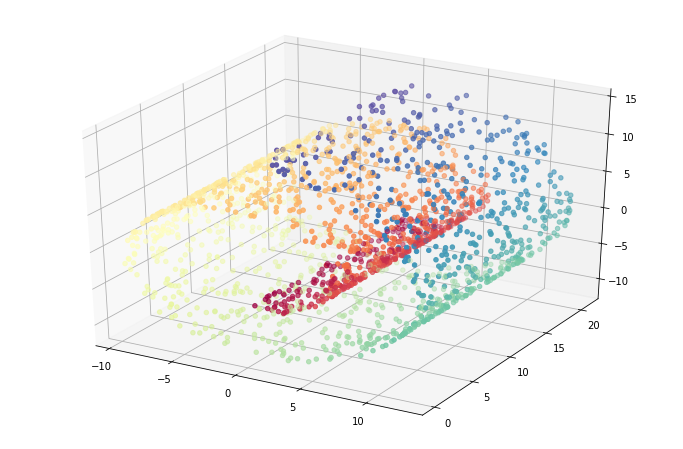

In [ ]:
X = pd.DataFrame(X)

ax = plt.subplots(figsize=(12, 8))
ax = plt.axes(projection ='3d')

ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.Spectral);

#essentially a 2D carpet that has been folded up in 3 dimensions
#points that are close to one another are points that are in the same category/class

##Manifold Learning

In [ ]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X) #we are gonna reduce the dimensions to 2 dimensions
    
    print ("New shape of X : ", X.shape) #print shape of data
    
    X = pd.DataFrame(X)
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.Spectral) #plot this now reduced dimensionality in terms of scatter plot
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

##Apply MDS
- n_components : Number of dimensions in which to immerse the dissimilarities.
- metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
- embedding_ :Stores the position of the dataset in the embedding space.
- stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (2000, 2)


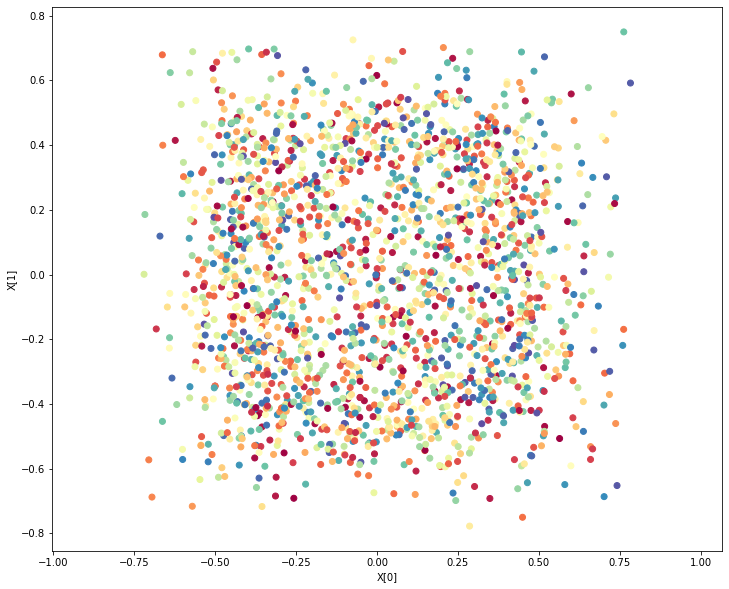

In [ ]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))
#we want original data to be expressed in 2 dimensions, which is why n_components = 2
#MDS did not do well because all the colors are on top of each other and not scattered well 
#points that were originally close together are far apart
#this is because we set metric to False

#MDS method reduces dimensionality while trying to preserve the distances between instances

New shape of X :  (2000, 2)


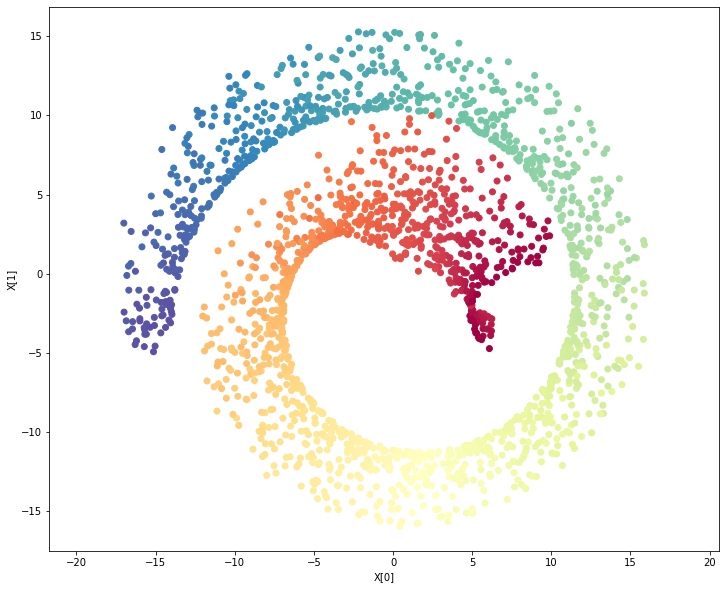

In [ ]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))
#setting the metric to True preserved the categories, even in 2 dimensions

##Apply LLE
- n_neighbors :number of neighbors to consider for each point.

- n_components : number of coordinates for the manifold

- method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’

- standard : use the standard locally linear embedding algorithm.

- hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2

- modified : use the modified locally linear embedding algorithm.

- ltsa : use local tangent space alignment algorithm

- embedding_ : Stores the embedding vectors

- reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (2000, 2)


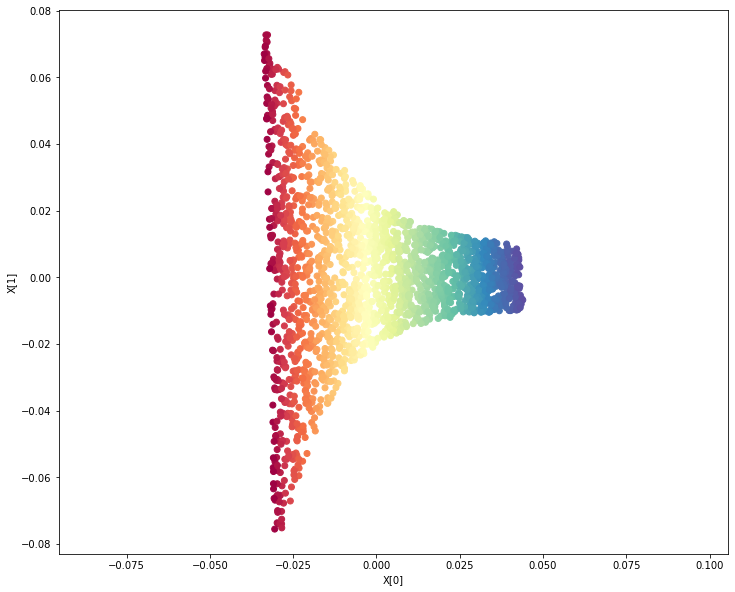

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, 
                                                        n_components = 2, 
                                                        method = 'standard') ) 

#uses 15 nearest neighbors for algorithm

#locally linear embedding measures how each instance relates to its closest neighbors and tries to find a lower dimensionality representation which preserves local relationships
#however, this method often distorts data, even if the local relationships are preserved (points that were close remain close)

##Apply HLLE
- embedding_ : Stores the embedding vectors

- reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (2000, 2)


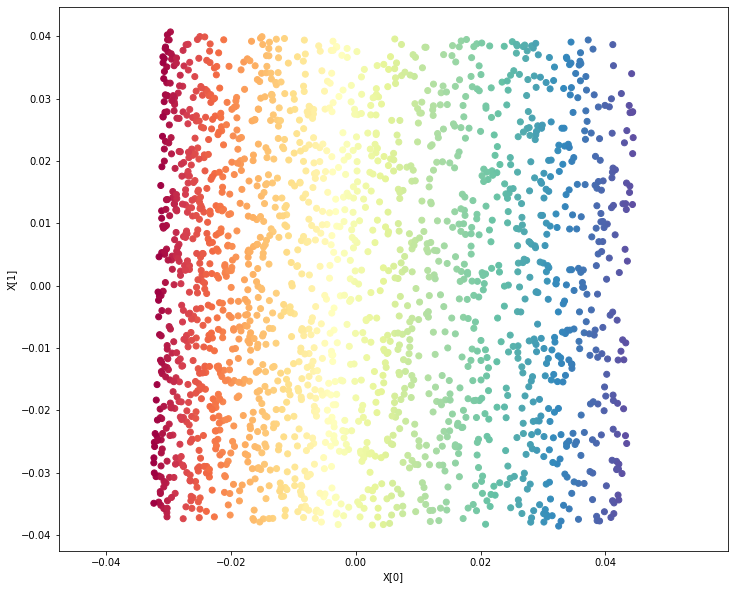

In [ ]:
hlle = apply_manifold_learning(X, LocallyLinearEmbedding(n_neighbors = 15, 
                                                         n_components = 2, 
                                                         method = 'hessian'))

#hessian = more performant and gives better results -- removes distortion -- carpet unrolled well